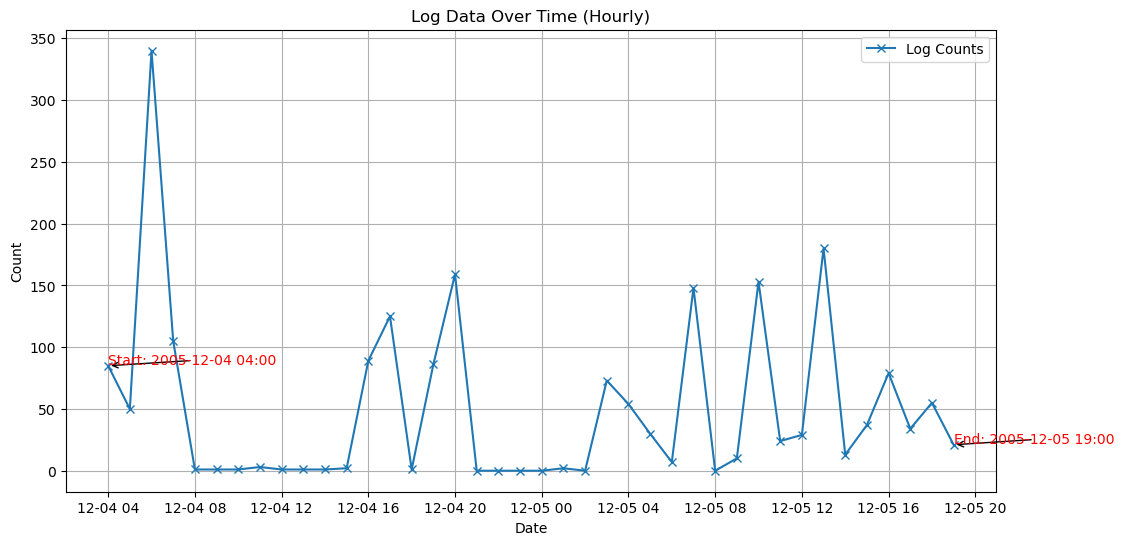

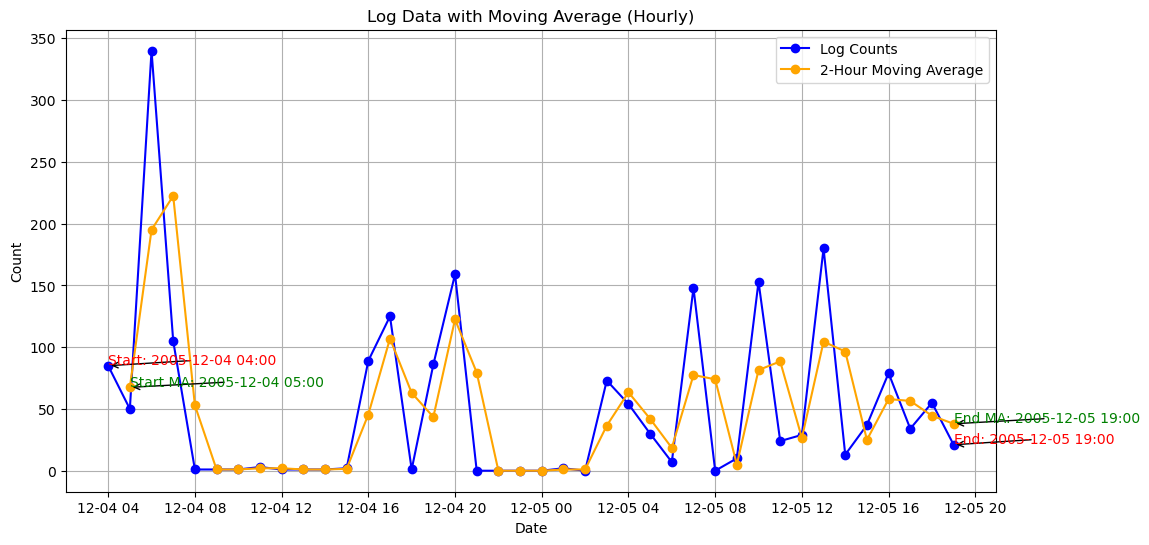

In [1]:
#1. Time Series Analysis: Analyzing and visualizing number of logs over time (hourly) to identify patterns.
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('cleaned_log_data.csv')

# Combine 'date' and 'time' into a single 'datetime' column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Set 'datetime' as index
df.set_index('datetime', inplace=True)

# Drop the original 'date' and 'time' columns
df.drop(['date', 'time'], axis=1, inplace=True)

# Resample the data by hour and count the occurrences
df_resampled = df.resample('H').size()

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled, label='Log Counts', marker='x')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Log Data Over Time (Hourly)')
plt.legend()
plt.grid(True)

# Annotate start and end points
plt.annotate(f'Start: {df_resampled.index[0].strftime("%Y-%m-%d %H:%M")}',
             xy=(df_resampled.index[0], df_resampled.iloc[0]),
             xytext=(df_resampled.index[0], df_resampled.iloc[0] + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='red')
plt.annotate(f'End: {df_resampled.index[-1].strftime("%Y-%m-%d %H:%M")}',
             xy=(df_resampled.index[-1], df_resampled.iloc[-1]),
             xytext=(df_resampled.index[-1], df_resampled.iloc[-1] + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='red')

plt.show()

# Calculate and plot moving averages
window_size = 2  # Set window size for moving average, adjust as needed
df_resampled_ma = df_resampled.rolling(window=window_size).mean()

# Plot the log data with moving average
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled, label='Log Counts', marker='o', linestyle='-', color='blue')
plt.plot(df_resampled_ma.index, df_resampled_ma, marker='o', label=f'{window_size}-Hour Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Log Data with Moving Average (Hourly)')
plt.legend()
plt.grid(True)

# Annotate start and end points for the original data plot
plt.annotate(f'Start: {df_resampled.index[0].strftime("%Y-%m-%d %H:%M")}',
             xy=(df_resampled.index[0], df_resampled.iloc[0]),
             xytext=(df_resampled.index[0], df_resampled.iloc[0] + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='red')
plt.annotate(f'End: {df_resampled.index[-1].strftime("%Y-%m-%d %H:%M")}',
             xy=(df_resampled.index[-1], df_resampled.iloc[-1]),
             xytext=(df_resampled.index[-1], df_resampled.iloc[-1] + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='red')

# Annotate start and end points for the moving average plot
plt.annotate(f'Start MA: {df_resampled_ma.index[window_size-1].strftime("%Y-%m-%d %H:%M")}',
             xy=(df_resampled_ma.index[window_size-1], df_resampled_ma.iloc[window_size-1]),
             xytext=(df_resampled_ma.index[window_size-1], df_resampled_ma.iloc[window_size-1] + 1),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10, color='green')
plt.annotate(f'End MA: {df_resampled_ma.index[-1].strftime("%Y-%m-%d %H:%M")}',
             xy=(df_resampled_ma.index[-1], df_resampled_ma.iloc[-1]),
             xytext=(df_resampled_ma.index[-1], df_resampled_ma.iloc[-1] + 1),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10, color='green')

plt.show()

Soon after 4th December, 2005 there is a sudden fluctuation and compression in the number of logs from 4am till 8am. Then, maybe due to data inconsistency or some other reason, there are no logs between 8 am and 3pm. Then, After 3pm, there is sudden appearence of logs, but not as much from 4am till 8 am. This continues till 8pm, after which there is no logs till 2am of 5th December, 2005. Then after that,  we can see high and low altering number of logs suggesting that the person/ people are wide awake and actively using the network. Then, the number of logs decrease rapidly after 4pm of 5th December, 2005. Then, the number of logs last recorded ends at 7pm, with a count of 25 (approx). This shows a trend where the people have different hours of being awake and working in different days. 

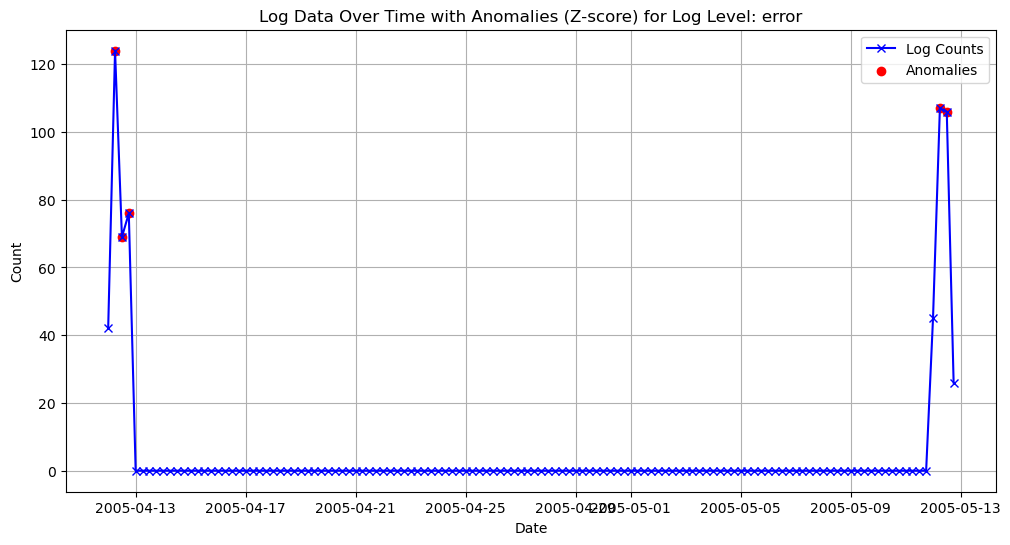

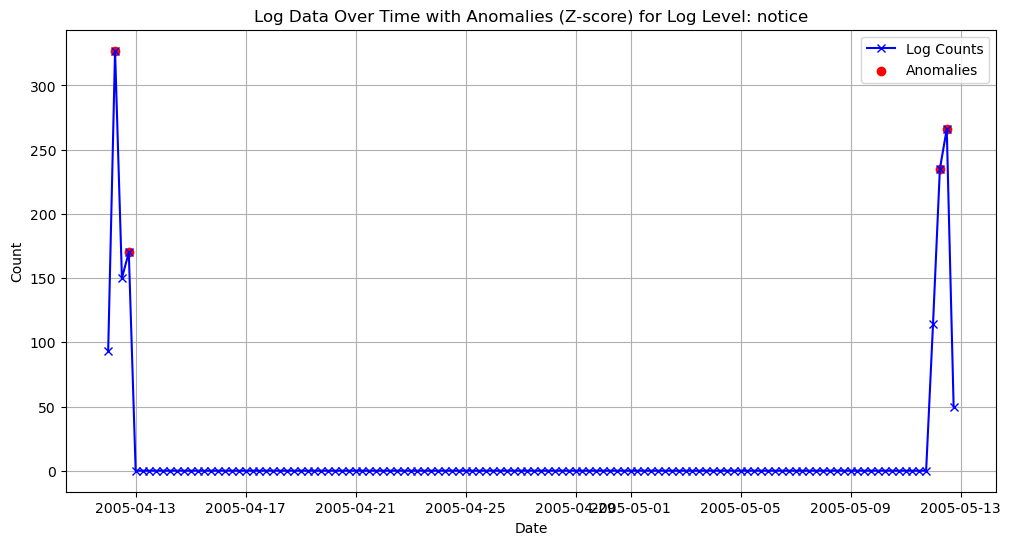

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the data
df = pd.read_csv('cleaned_log_data.csv')

# Combine 'date' and 'time' into a single 'datetime' column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Set 'datetime' as index
df.set_index('datetime', inplace=True)

# Drop the original 'date' and 'time' columns
df.drop(['date', 'time'], axis=1, inplace=True)

# Function to detect anomalies for a specific log level
def detect_anomalies(log_level):
    # Filter data by log level
    df_filtered = df[df['log_level'] == log_level]

    # Resample the data by hour and count the occurrences
    df_resampled = df_filtered.resample('6H').size()

    # Calculate Z-scores
    df_resampled_zscore = zscore(df_resampled)
    df_resampled = pd.DataFrame(df_resampled, columns=['count'])
    df_resampled['zscore'] = df_resampled_zscore

    # Identify anomalies based on Z-score threshold (e.g., |Z| > 3)
    threshold = 3
    anomalies = df_resampled[np.abs(df_resampled['zscore']) > threshold]

    # Plot the data with anomalies highlighted
    plt.figure(figsize=(12, 6))
    plt.plot(df_resampled.index, df_resampled['count'], label='Log Counts', marker='x', color='blue')
    plt.scatter(anomalies.index, anomalies['count'], color='red', label='Anomalies', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Log Data Over Time with Anomalies (Z-score) for Log Level: {log_level}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Detect anomalies for 'error' log level
detect_anomalies('error')

# Detect anomalies for 'notice' log level
detect_anomalies('notice')

In [33]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
df = pd.read_csv('cleaned_log_data.csv')

# Combine 'date' and 'time' into a single 'datetime' column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Set 'datetime' as index
df.set_index('datetime', inplace=True)

# Drop the original 'date' and 'time' columns
df.drop(['date', 'time'], axis=1, inplace=True)

def trend_analysis(log_level):
    # Filter data by log level
    df_filtered = df[df['log_level'] == log_level]
    
    # Resample the data by 30 minutes and count the occurrences
    df_resampled = df_filtered.resample('30T').size()

    # Apply rolling average with a window of 6 (equivalent to 3 hours if resampled by 30 minutes)
    rolling_avg = df_resampled.rolling(window=6).mean()

    # Apply exponential smoothing
    exp_smooth = ExponentialSmoothing(df_resampled, trend='add', seasonal=None).fit()

    # Create the plot
    trace1 = go.Scatter(x=df_resampled.index, y=df_resampled, mode='lines+markers', name='Log Counts', opacity=0.6)
    trace2 = go.Scatter(x=rolling_avg.index, y=rolling_avg, mode='lines+markers', name='Rolling Average', line=dict(color='magenta'))
    trace3 = go.Scatter(x=exp_smooth.fittedvalues.index, y=exp_smooth.fittedvalues, mode='lines+markers', name='Exponential Smoothing', line=dict(color='green'))

    data = [trace1, trace2, trace3]

    layout = go.Layout(
        title=f'Log Data with Rolling Average and Exponential Smoothing (Resampled by 30 Minutes) - {log_level}',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Count'),
        showlegend=True
    )

    fig = go.Figure(data=data, layout=layout)
    pyo.iplot(fig)

# Perform trend analysis for 'error' log level
trend_analysis('error')

# Perform trend analysis for 'notice' log level
trend_analysis('notice')

In [6]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/626.3 kB 363.1 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 544.7 kB/s eta 0:00:01
   --------------- ------------------------ 245.8/626.3 kB 1.0 MB/s eta 0:00:01
   ---------------------- ----------------- 348.2/626.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 1.5 MB/s eta 0:00:01
   -----------------------

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\drsar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\drsar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [12]:
pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/27/ad/7047095224013ec2ae37ba8ece5956773e7953c39a3af5aa20d821ed99aa/dash-2.17.1-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [37]:
error_df.index = pd.to_datetime(error_df.index)
notice_df.index = pd.to_datetime(notice_df.index)

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.corpus import stopwords
import re
import string
from dash import Dash, dcc, html
import plotly.express as px

# Load CSV data
df = pd.read_csv('cleaned_log_data.csv')

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Combine 'date' and 'time' into a single 'datetime' column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Set 'datetime' as index
df.set_index('datetime', inplace=True)

# Apply preprocessing
df['cleaned_message'] = df['message'].apply(preprocess)

# Keyword extraction with TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
feature_names = vectorizer.get_feature_names_out()

# Sentiment analysis with TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['message'].apply(get_sentiment)

# Create separate dataframes for different log levels
error_df = df[df['log_level'] == 'error']
notice_df = df[df['log_level'] == 'notice']

# Resample the data by month and hour
error_monthly_hourly = error_df.resample('H').mean().groupby([error_df.index.month, error_df.index.hour]).mean()
notice_monthly_hourly = notice_df.resample('H').mean().groupby([notice_df.index.month, notice_df.index.hour]).mean()

# Reset index for Plotly
error_monthly_hourly = error_monthly_hourly.reset_index()
error_monthly_hourly.columns = ['Month', 'Hour', 'Sentiment']

notice_monthly_hourly = notice_monthly_hourly.reset_index()
notice_monthly_hourly.columns = ['Month', 'Hour', 'Sentiment']

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1('Sentiment Analysis Dashboard'),

    dcc.Graph(
        id='sentiment-time-series-error',
        figure=px.line(error_monthly_hourly, x='Hour', y='Sentiment', color='Month', title='Sentiment Scores by Hour for Error Logs', labels={'Hour': 'Hour of the Day', 'Sentiment': 'Sentiment Score'})
    ),
    
    dcc.Graph(
        id='sentiment-time-series-notice',
        figure=px.line(notice_monthly_hourly, x='Hour', y='Sentiment', color='Month', title='Sentiment Scores by Hour for Notice Logs', labels={'Hour': 'Hour of the Day', 'Sentiment': 'Sentiment Score'})
    ),
    
    dcc.Graph(
        id='sentiment-log-level',
        figure=px.box(df, x='log_level', y='sentiment', title='Sentiment Scores by Log Level')
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)

TypeError: Could not convert 04-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-200504-12-2005 to numeric

# Sentiment Scores Over Time for Error Logs:
The **horizontal line at the sentiment score of 0** implies that the sentiment analysis of the error logs has resulted in a **neutral sentiment score** throughout the time period shown. This means that the _error logs, on average, **do not exhibit positive or negative sentiment.**_